![data-x](http://oi64.tinypic.com/o858n4.jpg)

---
# Cookbook 3: Linear Regression

**Author list:** Alexander Fred Ojala

**References / Sources:** 
* http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise1.ipynb 
* http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr05.html (data)

**License Agreement:** Feel free to do whatever you want with this code

___

*This notebook highlights the basic ML concepts: Simple linear regression, multiple linear regression, and linear predicition.*

## Linear Regression & Prediction
___
Most basic predictive method in Machine Learning. The goal is to  minimize the sum of the squared errros to fit a straight line to a set of data points.

The linear regression model fits a linear function to a set of data points. For simple linear regression that is: 

$Y = \beta_0 + \beta_1 X$





where,

* $\beta_0$ is the intercept
* $\beta_1$ the slope parameter

* $Y$ is the dependent variable (sometimes called "target variable")

* $X$ is the independent variable (sometimes called "predictor", "regressor", or "feature")

In [145]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
#import data Fires per 10000 housing units and Thefts per 10000 population in Chicago

import os
path = os.getcwd() + '/data2.csv'
df = pd.read_csv(path, header=None, names=['Fires', 'Thefts']) #read in to table and add header
df.head()
data=df/10 #normalize data
df=df/10
df.insert(0, 'Ones', 1) # Insert ones for intercept

In [153]:
df.head()

,Ones,Fires,Thefts
0,1,0.62,2.9
1,1,0.95,4.4
2,1,1.05,3.6
3,1,0.77,3.7
4,1,0.86,5.3


## Simple and Multiple Linear Regression
___

Matrix multiplication Linear Regression to obtain the weights

$ W = (X^T X)^{-1} X^T Y $

$ W_1 = (X^T X)^{-1} $

$ W_2 = X^T Y $

In [155]:
#def lm_weights(df):

n=len(df) #number of rows
m=len(df.iloc[0,:])
df_matrix = df.as_matrix()
nx = df_matrix[:,0:(m-1)]
ny = df_matrix[:,m-1]
ny = ny[:,np.newaxis] # add new axis for matrix multiplication

W1 = np.linalg.inv(np.dot(nx.T,nx)) #Calculate first part of weight
W2 = np.dot(nx.T,ny)
W = np.dot(W1,W2)

weights_df = pd.DataFrame(W,index=['beta0','beta1'])
#print weights_df
#return W
    
#W = lm_weights(df)

(42,)
(42, 1)


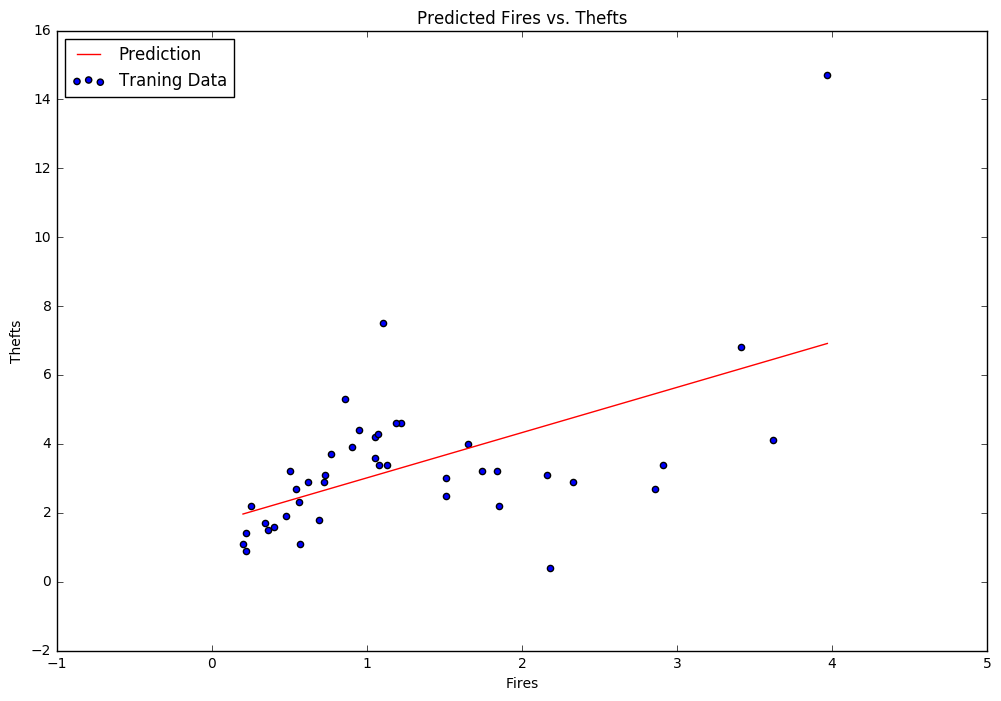

In [156]:
# Plot Results

x = np.linspace(data.Fires.min(), data.Fires.max(), 100)
f = W[0, 0] + (W[1, 0] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Fires, data.Thefts, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Fires')
ax.set_ylabel('Thefts')
ax.set_title('Predicted Fires vs. Thefts')

## Linear Regression with Gradient Descent and Cost function
___

Now let's implement linear regression using gradient descent to minimize the cost function. The equations implemented in the following code samples are detailed in "ex1.pdf" in the "exercises" folder.

First we'll create a function to compute the cost of a given solution (characterized by the parameters beta).

In [70]:
def computeCost(X, y, beta):
    inner = np.power(((X * beta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Now let's do some variable initialization.

In [115]:
# set X (training data) and y (target variable)
cols = df.shape[1]
X = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

Let's take a look to make sure X (training set) and y (target variable) look correct.

In [116]:
X.head()

,Ones,Fires
0,1,0.62
1,1,0.95
2,1,1.05
3,1,0.77
4,1,0.86


In [117]:
y.head()

,Thefts
0,2.9
1,4.4
2,3.6
3,3.7
4,5.3


The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize beta.

In [118]:
X = np.matrix(X.values)
y = np.matrix(y.values)
beta = np.matrix(np.array([0,0]))

Here's what beta looks like.

In [119]:
beta

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.

In [120]:
X.shape, beta.shape, y.shape

((42, 2), (1, 2), (42, 1))

Now let's compute the cost for our initial solution (0 values for theta).

In [121]:
computeCost(X, y, beta)

8.2583333333333329

So far so good. Now we need to define a function to perform gradient descent on the parameters beta.

In [122]:
def gradientDescent(X, y, beta, alpha, iters):
    temp = np.matrix(np.zeros(beta.shape))
    parameters = int(beta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * beta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = beta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        beta = temp
        cost[i] = computeCost(X, y, beta)
        
    return beta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

In [123]:
alpha = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [124]:
g, cost = gradientDescent(X, y, beta, alpha, iters)
g

matrix([[ 1.65628809,  1.33792834]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [125]:
computeCost(X, y, g)

1.80444799100861

Now let's plot the linear model along with the data to visually see how well it fits.

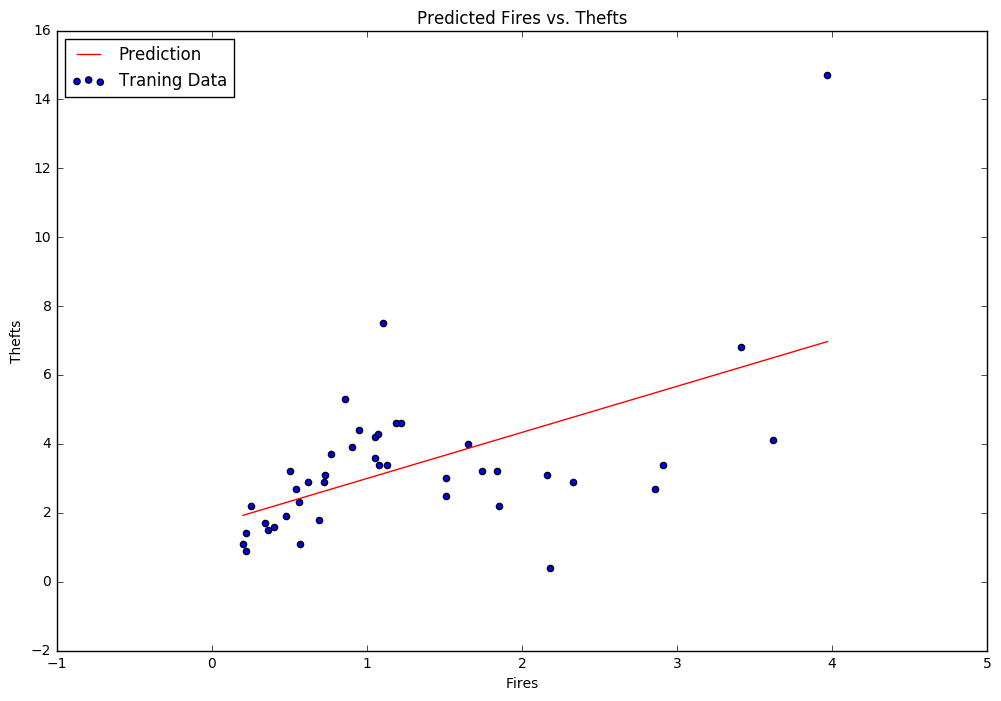

In [127]:
x = np.linspace(data.Fires.min(), data.Fires.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Fires, data.Thefts, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Fires')
ax.set_ylabel('Thefts')
ax.set_title('Predicted Fires vs. Thefts')

Looks pretty good! Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well. Notice that the cost always decreases - this is an example of a convex optimization problem.

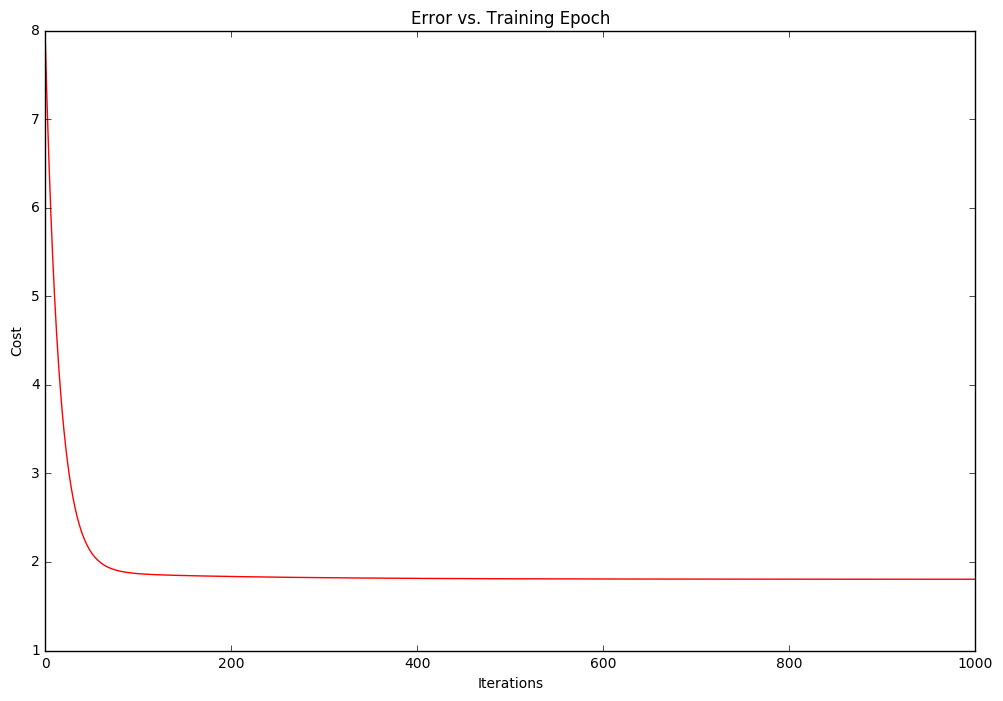

In [128]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Multiple Linear Regression

Exercise 1 also included a housing price data set with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house). Let's use the techniques we already applied to analyze that data set as well.

In [129]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


For this task we add another pre-processing step - normalizing the features. This is very easy with pandas.

In [130]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [131]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

We can take a quick look at the training progess for this one as well.

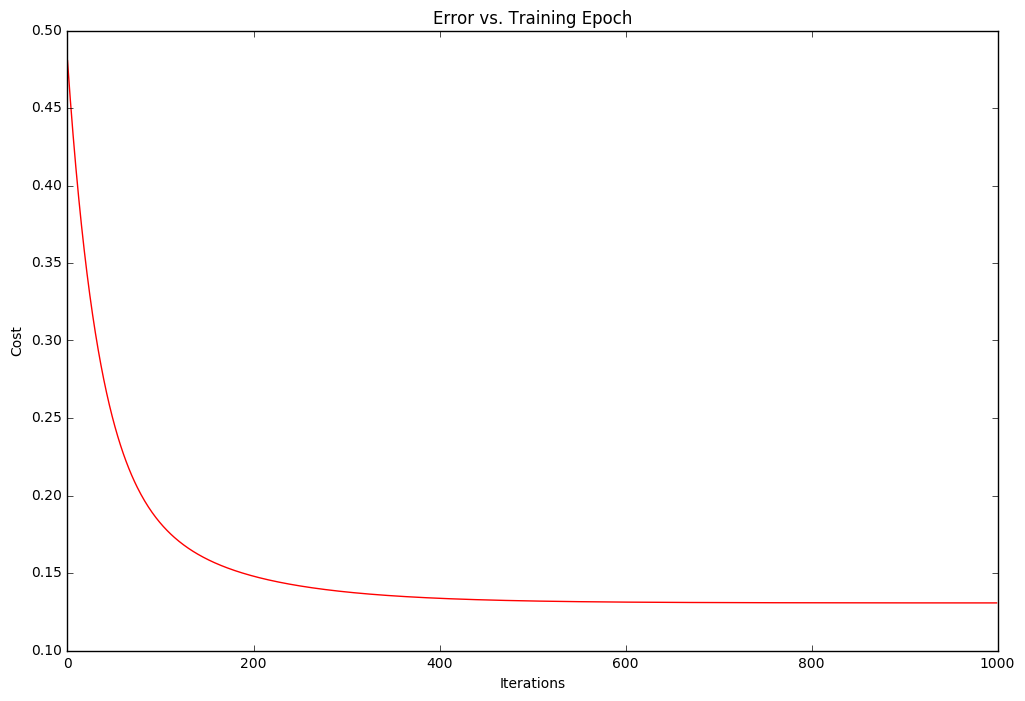

In [132]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function. Let's apply scikit-learn's linear regressio algorithm to the data from part 1 and see what it comes up with.

In [133]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Here's what the scikit-learn model's predictions look like.

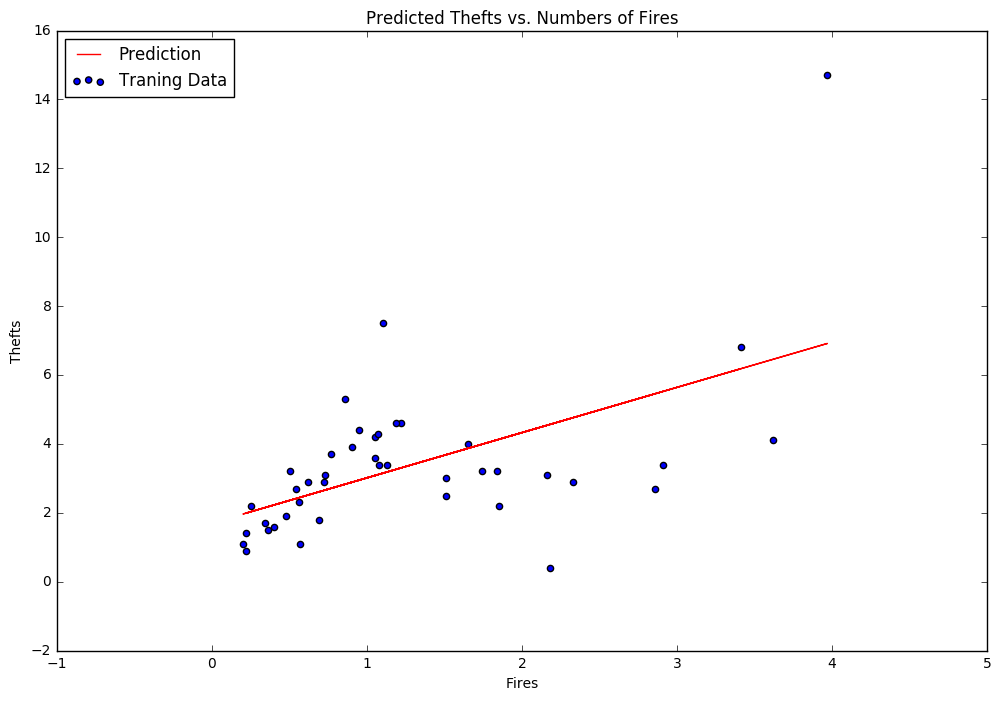

In [139]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Fires, data.Thefts, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Fires')
ax.set_ylabel('Thefts')
ax.set_title('Predicted Thefts vs. Numbers of Fires')